# Mitigate

In [1]:
# OK
# import packages

import os 
import regex as re
import numpy as np 
from matplotlib import pyplot as plt, gridspec as gridspec # local: 3.4.1

In [2]:
# OK

# enum patterns
pat_ts = "ts:([0-9]+\.[0-9]+)"
pat_rtt = "time=([0-9]+[\.0-9]*)\sms"
pat_cwnd = "cwnd:([0-9]+[\.0-9]*)"
pat_qlen = "qlen:([0-9]+[\.0-9]*)"

va_type = ['cwnd', 'qlen', 'rtt']
al_type = ['taildrop', 'red', 'codel']

In [3]:
# OK

# Extract 
def extract_txt_for_mt(data_dir):
    '''
    usage: algo = 'taildrop', 'red', or 'codel'
    '''
    path = "./algo-" + data_dir + "/" + "rtt.txt"

    l_ts = []
    l_va = []
    base_ts = 0
    flag = 1
    with open(path, 'r') as file:
        logs = file.readlines()
        for log in logs:
            # pattern match
            ts_match_list = re.findall(pat_ts, log)
            va_match_list = re.findall(pat_rtt, log)
            if len(va_match_list) < 1:
                continue
            if len(ts_match_list) < 1:
                break
            
            # store relative time stamp
            ts = float(ts_match_list[0]) - base_ts
            if flag==1 :
                base_ts = ts
                ts = 0
                flag = 0
            
            # store va value
            va = float(va_match_list[0])
            
            l_ts.append(ts)
            l_va.append(va)

    # test or true return
    return l_ts, l_va


In [4]:
# TODO
# plotting and save results
import math
# plot figs
count = 0
table = []
for algo in al_type:
    tab = []
    x, y = extract_txt_for_mt(algo)
    # for e in x:
    #     e = math.log(e+0.00000001)
    # for e in y:
    #     e = math.log(e+0.00000001)
    tab.append(x)
    tab.append(y)
    table.append(tab)

# note:
#
# |id | algo     |'c'|
# |---|----------|---|
# | 0 | taildrop | b |
# | 1 | red      | r |
# | 2 | codel    | g |

mt_colors = ['b', 'r', 'g']



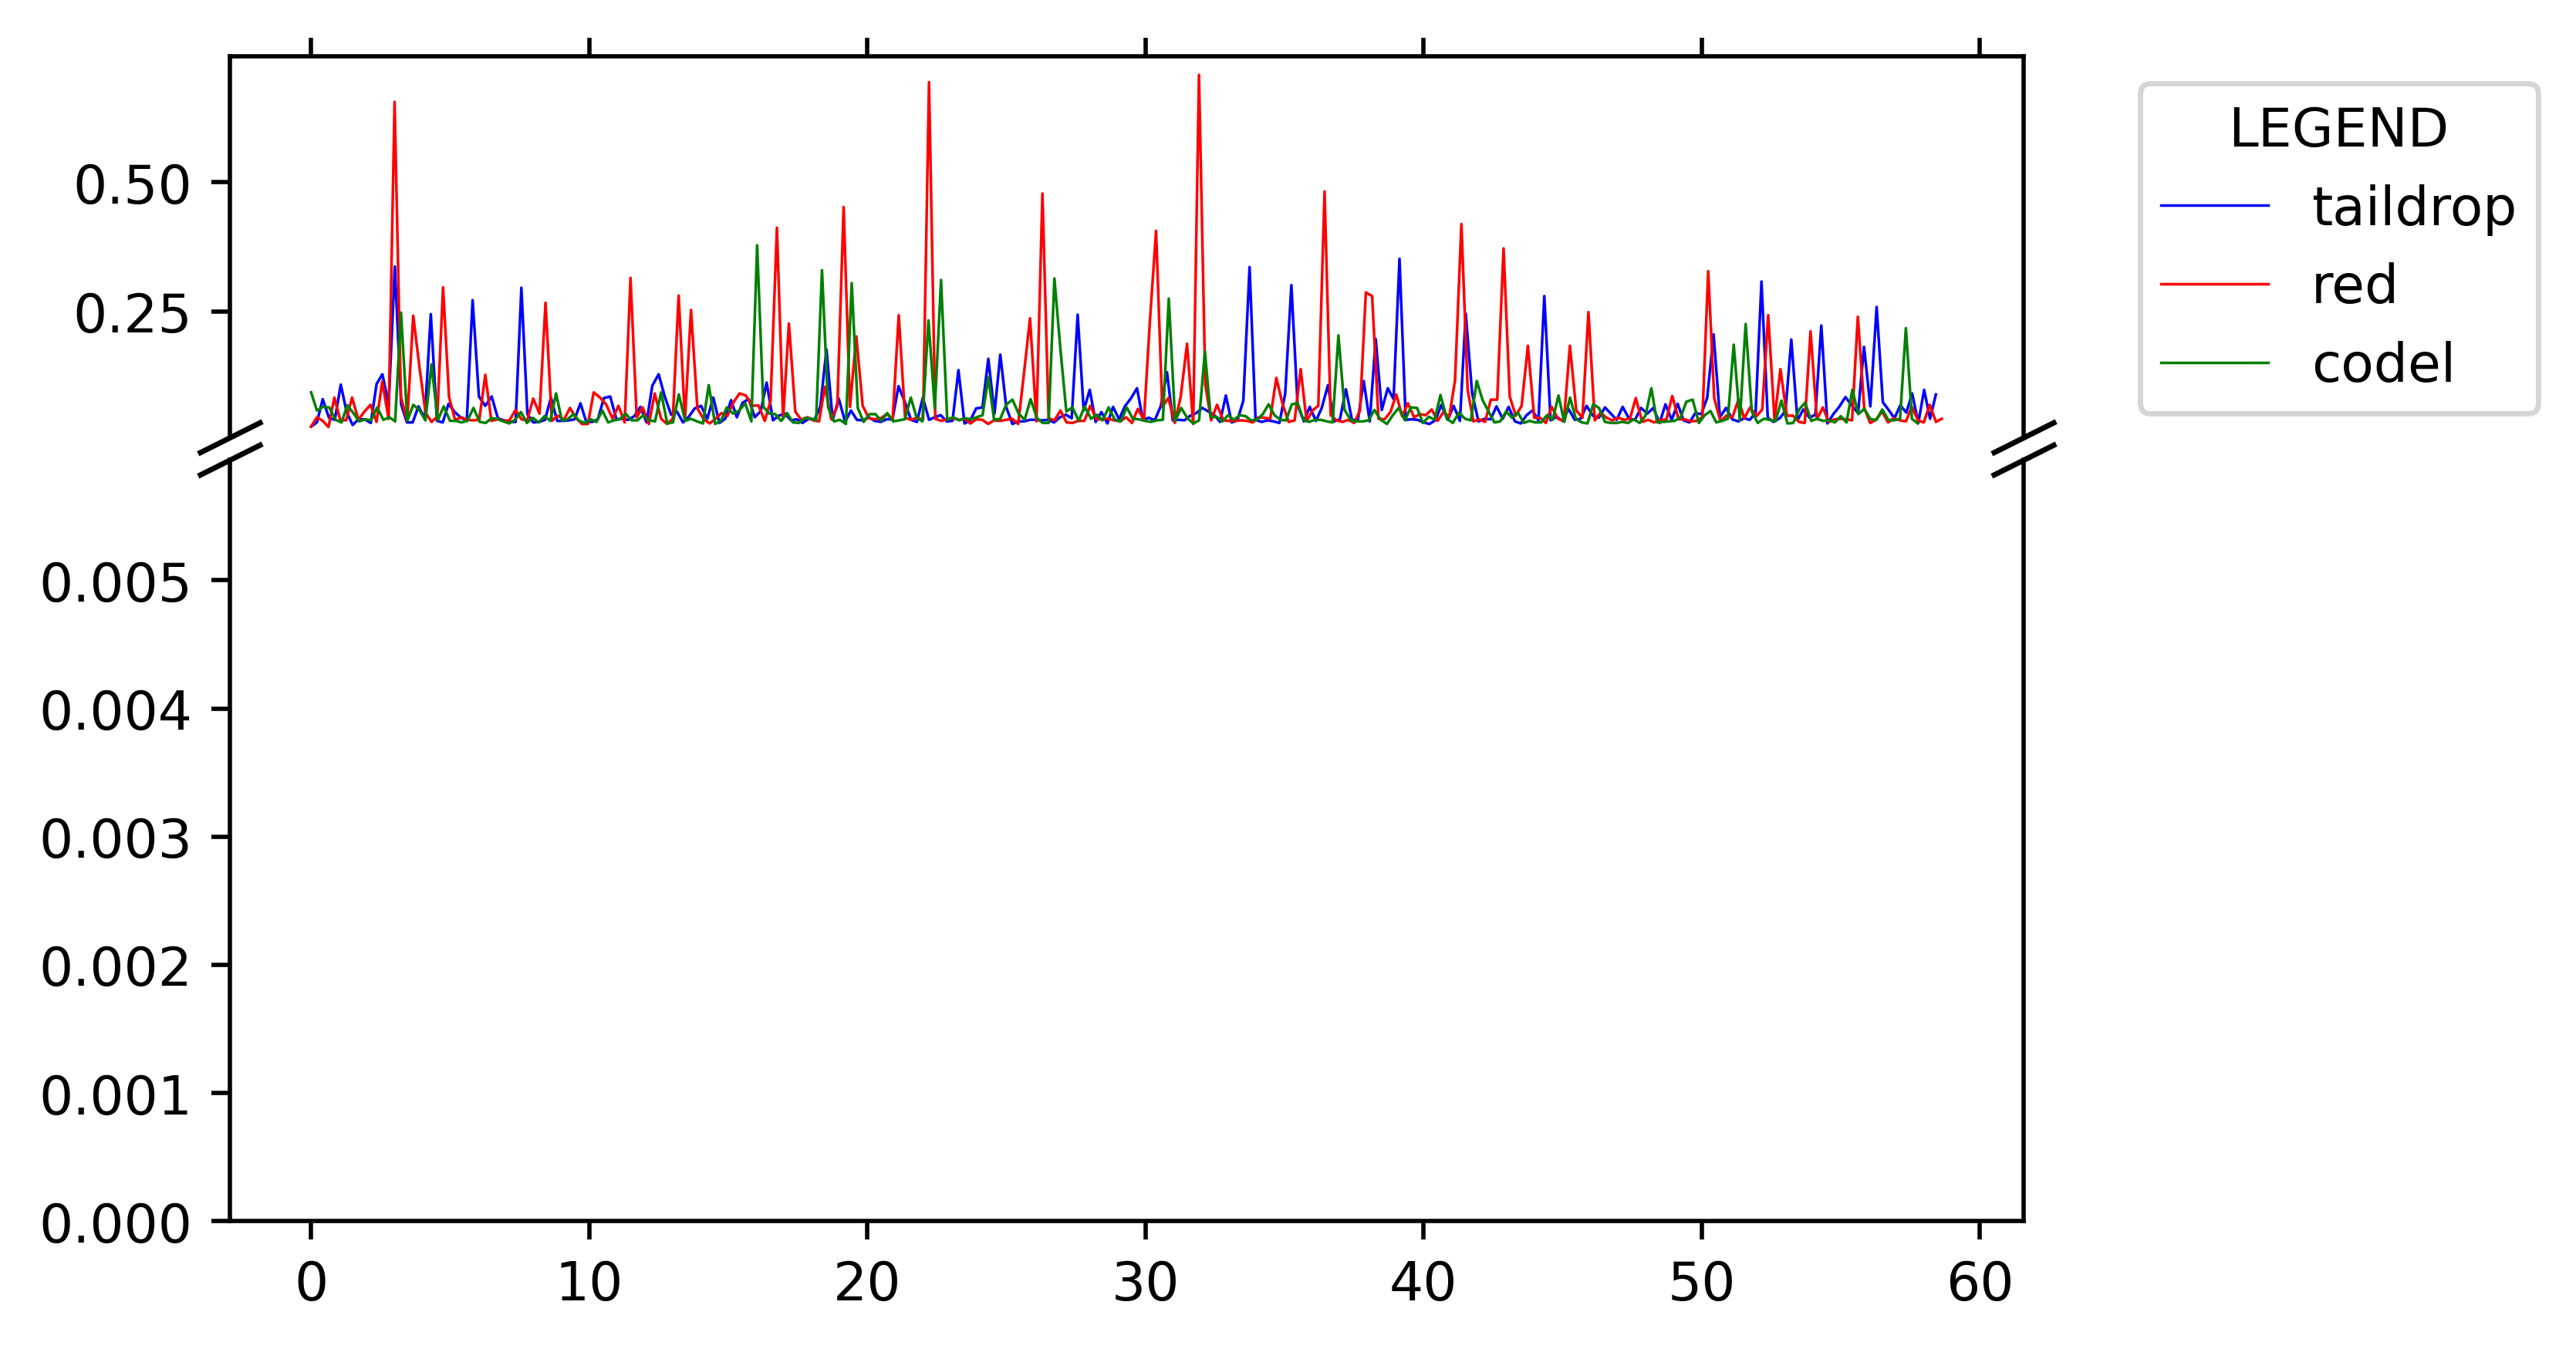

In [5]:
# make ratio for up:down
n = 1 # upper subplot as n
m = 2 # lower subplot as m
on = (n+m)/n
om = (n+m)/m

gs = gridspec.GridSpec(2, 1,
                       height_ratios=[n, m],
                       hspace=0.04)
fig = plt.figure(dpi=500)
ax1 = plt.subplot(gs[0, 0:])
ax2 = plt.subplot(gs[1, 0:], sharex=ax1)

l0 ,= ax1.plot(table[0][0], table[0][1], linewidth=0.5, color=mt_colors[0])
l0.set_label(al_type[0])
l1 ,= ax1.plot(table[1][0], table[1][1], linewidth=0.5, color=mt_colors[1])
l1.set_label(al_type[1])
l2 ,= ax1.plot(table[2][0], table[2][1], linewidth=0.5, color=mt_colors[2])
l2.set_label(al_type[2])
ax1.legend(title='LEGEND', bbox_to_anchor=(1.05, 1), loc='upper left')
l3 ,= ax2.plot(table[0][0], table[0][1], linewidth=0.5, color=mt_colors[0])
l3.set_label(al_type[0])
l4 ,= ax2.plot(table[1][0], table[1][1], linewidth=0.5, color=mt_colors[1])
l4.set_label(al_type[1])
l5 ,= ax2.plot(table[2][0], table[2][1], linewidth=0.5, color=mt_colors[2])
l5.set_label(al_type[2])
# ax2.legend()

upper = max([max(table[0][1]),
             max(table[1][1]),
             max(table[2][1])])*1.05

# zoom-in / limit the view to different portions of the data

# # set for test
# ax1.set_ylim(0.999*upper, upper)  # outliers only
# ax2.set_ylim(0, 0.99*upper)  # most of the data

ax1.set_ylim(0.01*upper, upper)  # outliers only
ax2.set_ylim(0, 0.008*upper)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# plt.show()
fig_path = "./figs_mt/rtt-fig.png"
plt.savefig(fig_path, bbox_inches = 'tight')
